<a href="https://colab.research.google.com/github/angelaomo/SALARY_PREDICTION/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [ ]:
#Read the file
df=pd.read_csv(r'https://raw.githubusercontent.com/ybifoundation/Dataset/main/Salary%20Data.csv')
df.head(2)

,Experience Years,Salary
0,1.1,39343
1,1.2,42774


In [ ]:
# Display data types of each column
df.dtypes



Experience Years    float64
Salary                int64
dtype: object

In [ ]:
# Display summary statistics for numerical variables
df.describe().round(2)


,Experience Years,Salary
count,40.00,40.00
mean,5.15,74743.62
std,2.66,25947.12
min,1.10,37731.00
25%,3.20,56878.25
50%,4.60,64472.50
75%,6.88,95023.25
max,10.50,122391.00


In [ ]:
# Display the shape of the DataFrame
print(df.shape)


(40, 2)


In [ ]:
# Check for missing values
print(df.isnull().sum())


Experience Years    0
Salary              0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()].sum()
duplicate_rows



Experience Years    0.0
Salary              0.0
dtype: float64

In [ ]:
# Calculate the correlation coefficient
correlation = df['Experience Years'].corr(df['Salary'])

print("Correlation coefficient between experience and salary:", correlation)

Correlation coefficient between experience and salary: 0.9776918968570496


In [ ]:
#check column headers
df.columns

Index(['Experience Years', 'Salary'], dtype='object')

#**DISTRIBUTION OF SALARY**

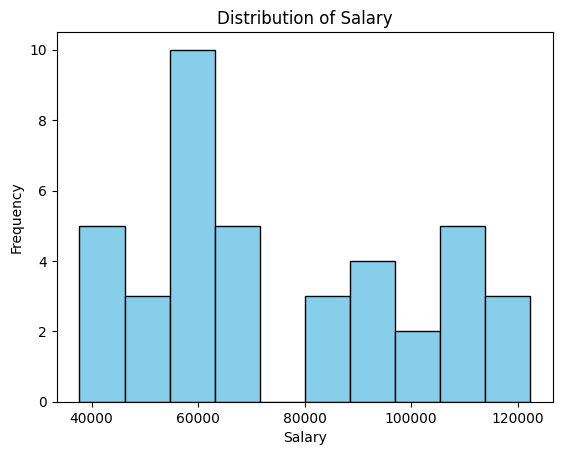

In [ ]:
# Histogram
plt.hist(df['Salary'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.show()

In [ ]:
#Check the shape and symmetry of the distributions of variables
from scipy.stats import skew
skewness=skew(df)
print(skewness)

[0.41308774 0.41007693]


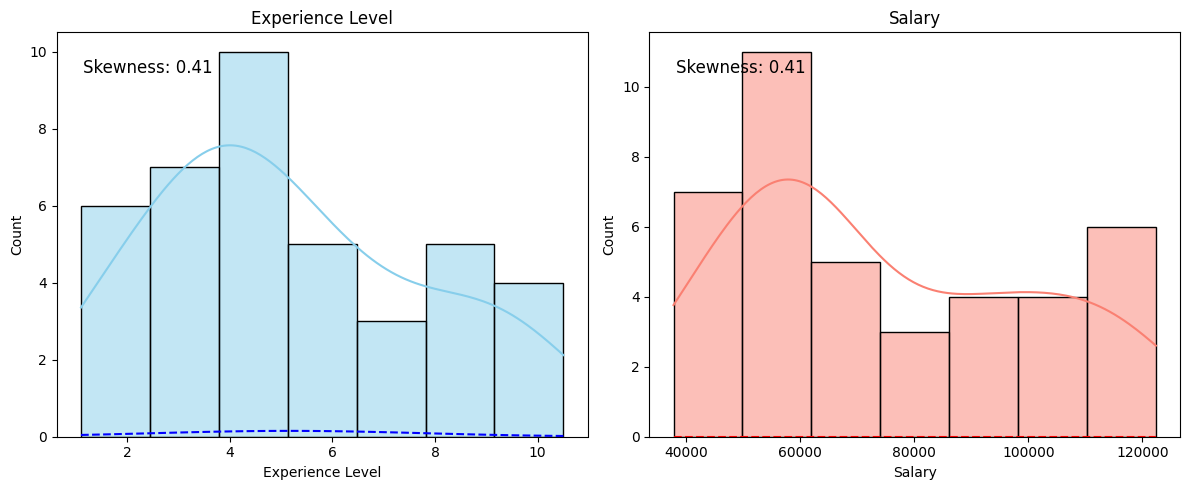

In [ ]:
from scipy.stats import norm, skew
#Calculate skewness

experience_skew = skew(df["Experience Years"])
salary_skew = skew(df["Salary"])

# Plot histograms and normal distribution curves
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["Experience Years"], kde=True, color='skyblue', ax=axes[0])
sns.histplot(df["Salary"], kde=True, color='salmon', ax=axes[1])

# Add normal distribution curve
x_exp = np.linspace(min(df["Experience Years"]), max(df["Experience Years"]), 100)
x_sal = np.linspace(min(df["Salary"]), max(df["Salary"]), 100)

axes[0].plot(x_exp, norm.pdf(x_exp, np.mean(df["Experience Years"]), np.std(df["Experience Years"])), color='blue', linestyle='--')
axes[1].plot(x_sal, norm.pdf(x_sal, np.mean(df["Salary"]), np.std(df["Salary"])), color='red', linestyle='--')

# Add skewness values
axes[0].text(0.05, 0.9, f'Skewness: {experience_skew:.2f}', transform=axes[0].transAxes, fontsize=12)
axes[1].text(0.05, 0.9, f'Skewness: {salary_skew:.2f}', transform=axes[1].transAxes, fontsize=12)

# Set titles and labels
axes[0].set_title('Experience Level')
axes[1].set_title('Salary')
axes[0].set_xlabel('Experience Level')
axes[1].set_xlabel('Salary')

plt.tight_layout()
plt.show()

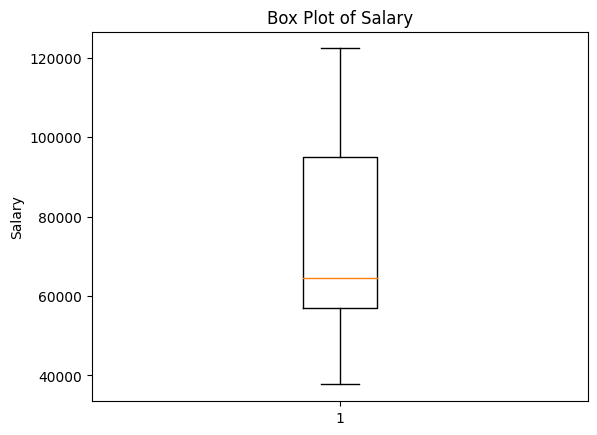

In [ ]:
# Box plot
plt.boxplot(df['Salary'])
plt.ylabel('Salary')
plt.title('Box Plot of Salary')
plt.show()


#**DISTRIBUTION OF YEARS OF EXPERIENCE**

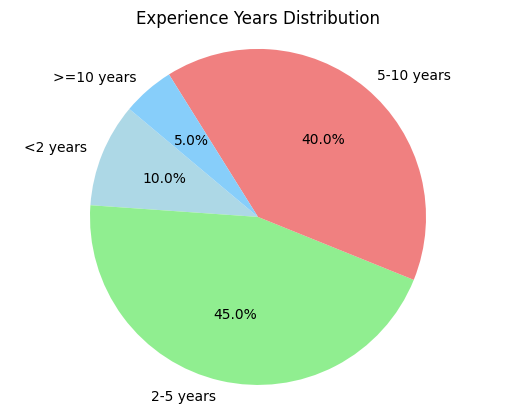

In [ ]:
# Pie chart
labels = ['<2 years', '2-5 years', '5-10 years', '>=10 years']
sizes = [len(df[df['Experience Years'] < 2]),
         len(df[(df['Experience Years'] >= 2) & (df['Experience Years'] < 5)]),
         len(df[(df['Experience Years'] >= 5) & (df['Experience Years'] < 10)]),
         len(df[df['Experience Years'] >= 10])]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Experience Years Distribution')
plt.axis('equal')
plt.show()


#**RELATIONSHIP BETWEEN SALARY AND EXPERIENCE**

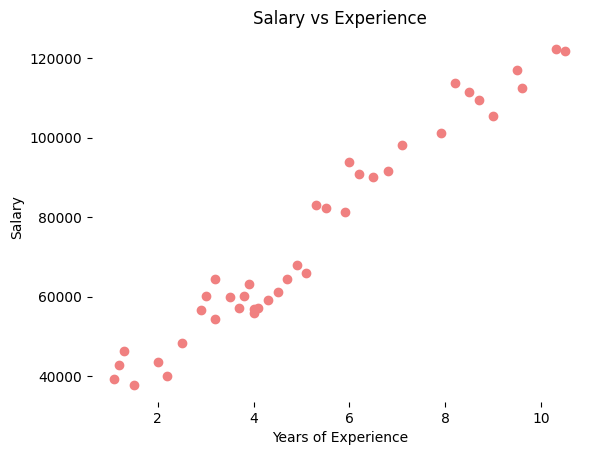

In [ ]:
# Relationship between Salary and Experience
plt.scatter(df['Experience Years'], df['Salary'], color='lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()


#**SPLITING DATA INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [ ]:
# Splitting variables
X = df[['Experience Years']]  # independent variable(s)
y = df['Salary']  # dependent variable


#**SPLITTING OF DATA INTO TRAINING AND TEST SET**

In [ ]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#**MODEL TRAINING**

In [ ]:
# Creating and fitting the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#**RESULT PREDICTION**

In [ ]:
# Prediction result
# predicted value of y_test
# predicted value of y_train

y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

#**PLOTTING OF THE TRAIN AND TEST RESULT**

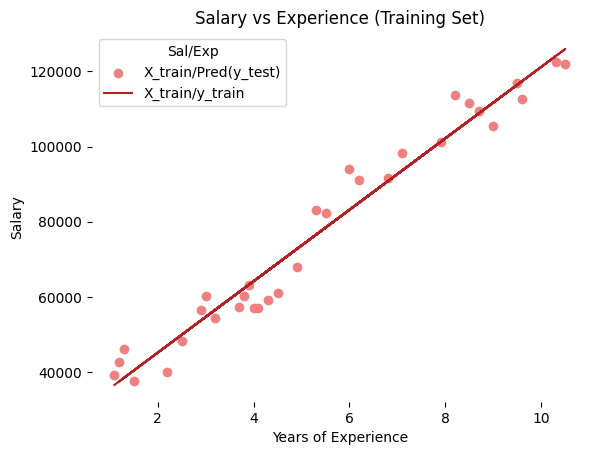

In [ ]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

#**MODEL PREDICTION ON THE TEST SET**

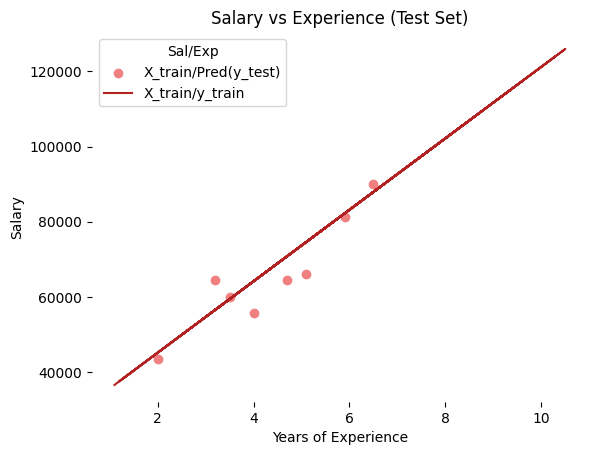

In [ ]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

#**COEFFICIENT AND INTERCEPT CALCULATION**

In [ ]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [9509.86964874]
Intercept: 26124.978629253572


The coefficient value of approximately 9509.87 means that for every additional year of experience, the predicted salary increases by approximately $9509.87, assuming all other factors remain constant.

The intercept value of approximately $26124.98 represents the estimated salary for someone with zero years of experience

#**Evaluate Model Performance**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# Evaluate model performance
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae.round(2))
print("R-squared:", r2.round(2))
print("Mean Squared Error:", mse.round(2))
print("Root Mean Squared Error:", rmse.round(2))

Mean Absolute Error (MAE): 4539.73
R-squared: 0.83
Mean Squared Error: 31765611.21
Root Mean Squared Error: 5636.1


#**MAKE PREDICTIONS**

In [ ]:
# Make predictions on new data
new_data = [[5.0], [6.0]]  # Example: predicting salaries for individuals with 5 and 6 years of experience
predicted_salaries = regressor.predict(new_data)
print("Predicted salaries:", predicted_salaries.round(2))


#**Make predictions on the test set**


In [ ]:
y_pred = regressor.predict(X_test)
y_pred

#**Plot Actual vs Predicted values**

In [ ]:
#Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

In [ ]:
Error=y_test-y_pred
Error

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False]
}

#Perform Grid Search Cross-Validation
grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score.round(2))


In summary, the grid search process identified that setting '**fit_intercept' to True resulted in the best performing model, achieving a score of 0.94**, which indicates a good fit between the predicted values and the actual values.